# Part 1: Prliminary analysis

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv("training.csv")#.set_index("article_number")
df.head()
#df.info()


,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [3]:
data = df[df.topic != "IRRELEVANT"].reset_index(drop=True)

## Some graphs about the number of words in each class

In [4]:
data['word_count'] = data.article_words.str.count(",")+1

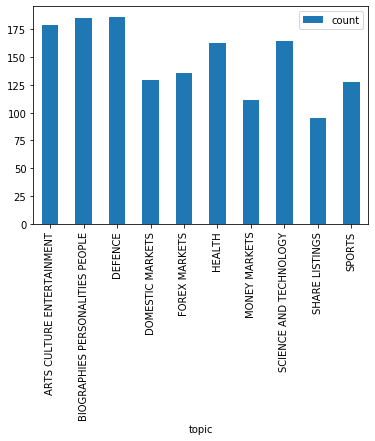

In [5]:
word_count_distribution = data.groupby("topic").word_count.mean().plot(kind="bar", label="count", legend="best")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

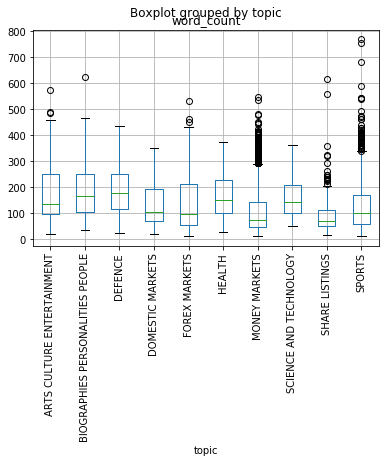

In [6]:
data.boxplot(column ='word_count',by ='topic')
plt.xticks(rotation=90)

## Counting the most frequent five words in each class

In [7]:
topic_group = data.groupby('topic')
most_frequent_word_list = {}
for name, group in topic_group :
    frequent_words = Counter(" ".join(group["article_words"]).split(",")).most_common(5)
    most_frequent_word_list.update({name:frequent_words})


In [8]:
most_frequent_word_list


{'ARTS CULTURE ENTERTAINMENT': [('year', 156),
  ('film', 153),
  ('million', 102),
  ('stat', 83),
  ('work', 81)],
 'BIOGRAPHIES PERSONALITIES PEOPLE': [('year', 249),
  ('presid', 198),
  ('yeltsin', 140),
  ('stat', 133),
  ('hospit', 124)],
 'DEFENCE': [('nato', 511),
  ('stat', 410),
  ('milit', 406),
  ('forc', 381),
  ('defend', 357)],
 'DOMESTIC MARKETS': [('import', 541),
  ('ton', 324),
  ('percent', 265),
  ('year', 262),
  ('oil', 191)],
 'FOREX MARKETS': [('dollar', 3358),
  ('bank', 2178),
  ('rate', 1720),
  ('trad', 1671),
  ('market', 1662)],
 'HEALTH': [('year', 253),
  ('health', 245),
  ('stat', 241),
  ('diseas', 184),
  ('tobacc', 169)],
 'MONEY MARKETS': [('bank', 4447),
  ('rate', 3684),
  ('percent', 3515),
  ('dollar', 3387),
  ('market', 2890)],
 'SCIENCE AND TECHNOLOGY': [('spac', 141),
  ('mir', 110),
  ('shuttl', 83),
  ('scient', 77),
  ('year', 73)],
 'SHARE LISTINGS': [('shar', 740),
  ('compan', 391),
  ('list', 347),
  ('million', 295),
  ('stock', 2

## Yangqi's work Agenda 

### Feature engineering

1. Pure word count method (Yunze)

2. Pure TF-IDF method (Raymond) 

3. Word count method with threshold (min max) *convert to TF-IDF*

4. Key words word count (top 10 in each group) give you 100 words *convert to TF-IDF*

### SVM 

1. build easy svm model 
    1. Train the model 
    2. Develop the model 
    3. Accuracy measure 
    4. Fit the test set
    5. Accuracy measure and recommendation 

2. SVM with grid search


3. SVM to classify irrelevant and relevant 


### Recommendation step

## Part 2 Construct different features datasets

In [9]:
import warnings

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [10]:
df = pd.read_csv("training.csv")
train_x_ori = df.article_words

In [11]:
vect = CountVectorizer().fit(train_x_ori)
print(f"vocabulary size: {len(vect.vocabulary_)}")
features = vect.get_feature_names()
#print(f"The top 20 most frequent words:\n{features[:20]}")
#print("\nFeatures 20010 to 20030:\n{}".format(features[20010:20030]))
#print("\nEvery 2000th feature:\n{}".format(features[::2000]))

vocabulary size: 35822


**2.1 count vector features w/ min max df**

In [12]:
train_x_wc = vect.transform(train_x_ori)
print(train_x_wc.shape) #first features dataset

(9500, 35822)


In [13]:
vect_min = CountVectorizer(min_df=5).fit(train_x_ori)
train_x_wc_min = vect_min.transform(train_x_ori)
print(train_x_wc_min.shape) #second features dataset, with minimum word frequent as 5 


(9500, 9495)


In [104]:
sum_words = train_x_wc_min.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vect_min.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(f"The top 20 most frequent words:\n{words_freq[:20]}")
print(f"The top 20 most infrequent words:\n{words_freq[-20:]}")

The top 20 most frequent words:
[('percent', 11610), ('bank', 9937), ('year', 9241), ('market', 8571), ('trad', 8446), ('rate', 7931), ('dollar', 7576), ('million', 7034), ('stat', 5162), ('cent', 4987), ('deal', 4795), ('shar', 4712), ('month', 4580), ('day', 4526), ('week', 4372), ('high', 4299), ('compan', 4041), ('pric', 3888), ('expect', 3877), ('clos', 3860)]
The top 20 most infrequent words:
[('livel', 5), ('renown', 5), ('indemn', 5), ('underneath', 5), ('cousin', 5), ('eek', 5), ('potat', 5), ('downs', 5), ('velli', 5), ('ilan', 5), ('and', 5), ('catherwood', 5), ('sandon', 5), ('dagmar', 5), ('retribut', 5), ('windy', 5), ('brow', 5), ('babel', 5), ('manager', 5), ('ventil', 5)]


In [105]:
#train_x_wc_max = CountVectorizer(max_df=500).fit(train_x_ori).transform(train_x_ori)
#print(train_x_wc_max.shape)

**2.2 tf-idf features w/ min max df**

In [17]:
train_x_tf = TfidfVectorizer().fit_transform(train_x_ori)
print(train_x_tf.shape)

(9500, 35822)


In [18]:
train_x_tf_min = TfidfVectorizer(min_df=5).fit_transform(train_x_ori)
print(train_x_tf_min.shape)

(9500, 9495)


In [106]:
#train_x_tf_max = TfidfVectorizer(max_df=500).fit_transform(train_x_ori)
#print(train_x_tf_max.shape)

**2.3 Key words methods**

In [20]:
def word_count_function(word_list,topic_df):
    #return the only the words in word_list occur in the topic_df
    occurence_df = pd.DataFrame() #show their occurence in other topics 
    for words in word_list:
        occurence_dict = {}
        for name, group in topic_df :
            word_counter = Counter(" ".join(group["article_words"]).split(","))
            occurence = word_counter[words]
            avg_occurence = occurence / len(group)
            occurence_dict.update({name:avg_occurence})
        occur_series = pd.Series(occurence_dict) 
        occur_series.name = words
        occurence_df = occurence_df.append(occur_series, ignore_index = True)
    return(occurence_df.T)

In [108]:
#finding the most frequent words in training set by topics
topic_group = df.groupby('topic')
most_frequent_word_list = {}
word_list_10 = []
for name, group in topic_group :
    frequent_words = Counter(" ".join(group["article_words"]).split(",")).most_common(10)
    most_frequent_word_list.update({name:frequent_words})
    common_words = [i[0] for i in frequent_words]
    word_list_10 = word_list_10 + common_words

In [109]:
print(most_frequent_word_list)


{'ARTS CULTURE ENTERTAINMENT': [('year', 156), ('film', 153), ('million', 102), ('stat', 83), ('work', 81), ('offic', 80), ('show', 72), ('releas', 72), ('peopl', 70), ('music', 69)], 'BIOGRAPHIES PERSONALITIES PEOPLE': [('year', 249), ('presid', 198), ('yeltsin', 140), ('stat', 133), ('hospit', 124), ('offic', 122), ('lead', 121), ('minist', 119), ('told', 117), ('report', 113)], 'DEFENCE': [('nato', 511), ('stat', 410), ('milit', 406), ('forc', 381), ('defend', 357), ('minist', 345), ('offic', 317), ('russia', 299), ('presid', 238), ('plan', 235)], 'DOMESTIC MARKETS': [('import', 541), ('ton', 324), ('percent', 265), ('year', 262), ('oil', 191), ('trad', 189), ('chin', 186), ('export', 161), ('million', 151), ('produc', 140)], 'FOREX MARKETS': [('dollar', 3358), ('bank', 2178), ('rate', 1720), ('trad', 1671), ('market', 1662), ('percent', 1336), ('currenc', 1214), ('deal', 1208), ('mark', 1191), ('yen', 962)], 'HEALTH': [('year', 253), ('health', 245), ('stat', 241), ('diseas', 184),

In [110]:
print(word_list_10)

['year', 'film', 'million', 'stat', 'work', 'offic', 'show', 'releas', 'peopl', 'music', 'year', 'presid', 'yeltsin', 'stat', 'hospit', 'offic', 'lead', 'minist', 'told', 'report', 'nato', 'stat', 'milit', 'forc', 'defend', 'minist', 'offic', 'russia', 'presid', 'plan', 'import', 'ton', 'percent', 'year', 'oil', 'trad', 'chin', 'export', 'million', 'produc', 'dollar', 'bank', 'rate', 'trad', 'market', 'percent', 'currenc', 'deal', 'mark', 'yen', 'year', 'health', 'stat', 'diseas', 'tobacc', 'drug', 'peopl', 'canc', 'study', 'percent', 'percent', 'year', 'million', 'trad', 'market', 'shar', 'compan', 'stat', 'bank', 'pric', 'bank', 'rate', 'percent', 'dollar', 'market', 'trad', 'day', 'deal', 'mark', 'currenc', 'spac', 'mir', 'shuttl', 'scient', 'year', 'station', 'crew', 'mission', 'system', 'nasa', 'shar', 'compan', 'list', 'million', 'stock', 'trad', 'exchang', 'pric', 'percent', 'market', 'play', 'win', 'game', 'year', 'match', 'champ', 'world', 'cup', 'team', 'scor']


In [111]:
word_list_group = [ [i for i in word_list_10[j*10 :(j+1)*10 ] if word_list_10.count(i) == 1] for j in range(11) ]
print(word_list_group)

[['film', 'work', 'show', 'releas', 'music'], ['yeltsin', 'hospit', 'lead', 'told', 'report'], ['nato', 'milit', 'forc', 'defend', 'russia', 'plan'], ['import', 'ton', 'oil', 'chin', 'export', 'produc'], ['yen'], ['health', 'diseas', 'tobacc', 'drug', 'canc', 'study'], [], ['day'], ['spac', 'mir', 'shuttl', 'scient', 'station', 'crew', 'mission', 'system', 'nasa'], ['list', 'stock', 'exchang'], ['play', 'win', 'game', 'match', 'champ', 'world', 'cup', 'team', 'scor']]


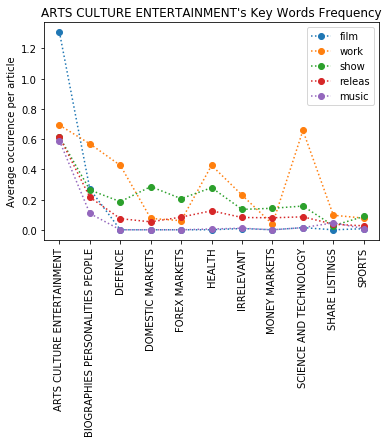

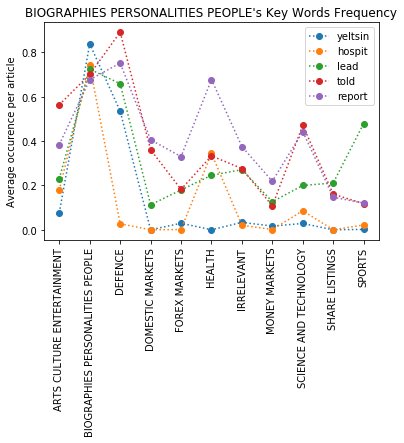

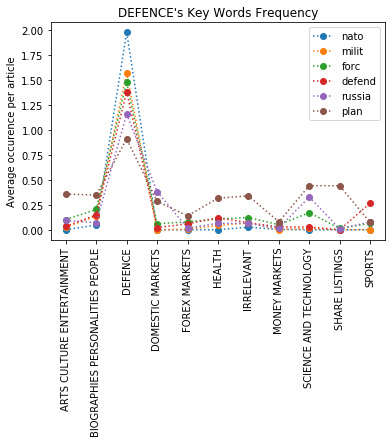

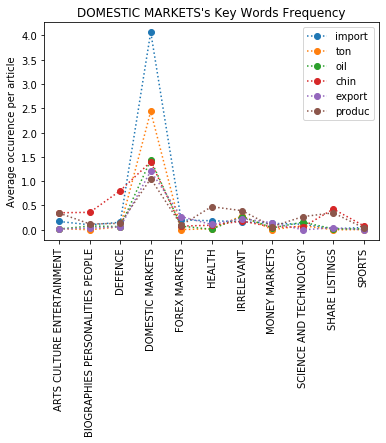

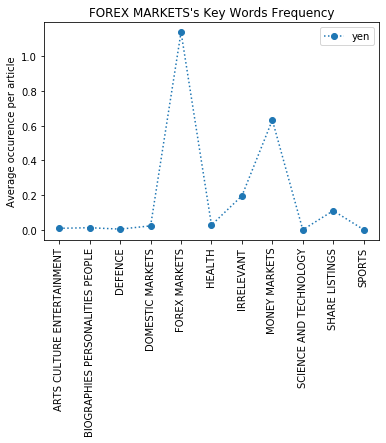

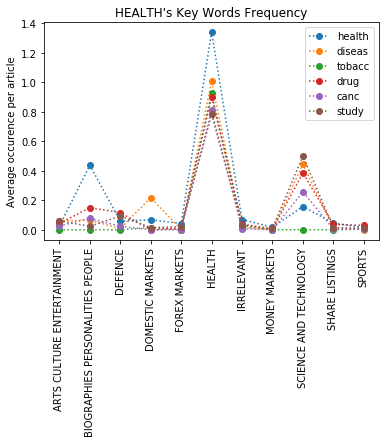

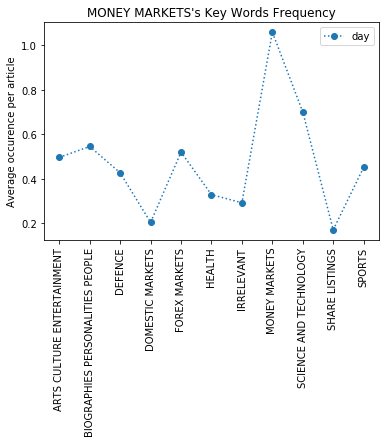

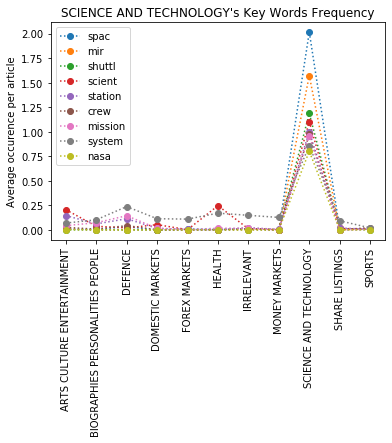

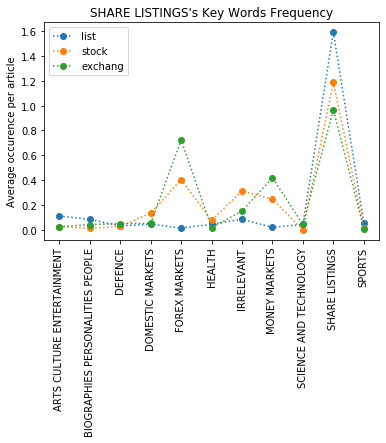

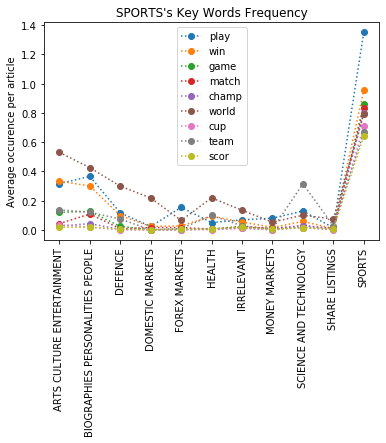

In [23]:
#visaulize key word's performance
for i in range(11):
    if i == 6:
        continue #irrelevant do not have any words
    my_words = word_list_group[i]
    my_df = word_count_function(my_words,topic_group)
    
    my_df.columns = my_words
    my_df.plot(marker='o',style = ':')
    plt.xticks(np.arange(11), list(my_df.index),rotation=90)

    plt.title(list(my_df.index)[i] + '\'s Key Words Frequency')
    plt.ylabel('Average occurence per article')
    plt.show()

**2.4: construct a cleaning dataset by the keywords**

In [25]:
unique_words  = [item for sublist in word_list_group for item in sublist]
def keep_key_words(x,word_list = word_list_10):
    key_list = [i for i in x.split(",") if i in  word_list]
    key_str = str(key_list).replace("'","").replace(" ","").replace("[","").replace("]","")
    return(key_str)
def keep_key_words2(x,word_list = unique_words):
    key_list = [i for i in x.split(",") if i in  word_list]
    key_str = str(key_list).replace("'","").replace(" ","").replace("[","").replace("]","")
    return(key_str)

In [28]:
train_x_kw1 = train_x_ori.apply(keep_key_words)

In [30]:
train_x_kw2 = train_x_ori.apply(keep_key_words2)

# Part 2 conclusions: The following datasets are available for model fitting 
1. train_x_wc; train_x_wc_min; train_x_wc_max (min max for number of articles for occurence)
2. train_x_tf; train_x_tf_min; train_x_tf_max
3. train_x_kw1; train_x_kw2 (you need to transfer it to wc and tf-idf as well)

# Part 3 SVM model 

1. Preliminary results using different datasets 
2. grid search for hyperparameters (cv)
3. test set results

**3.1 preliminary results**

In [72]:
from sklearn import svm
from sklearn.model_selection import cross_val_score,GridSearchCV

In [44]:
y_train = df.topic
train_x_kw1_tf = TfidfVectorizer().fit_transform(train_x_kw1)
train_x_kw1_wc = CountVectorizer().fit_transform(train_x_kw1)
train_x_kw2_tf = TfidfVectorizer().fit_transform(train_x_kw2)
train_x_kw2_wc = CountVectorizer().fit_transform(train_x_kw2)

x_train_list = [train_x_wc,train_x_wc_min,train_x_tf, train_x_tf_min,train_x_kw1_tf ,train_x_kw1_wc, train_x_kw2_tf, train_x_kw2_wc ]
x_train_name = ['train_x_wc','train_x_wc_min','train_x_tf', 'train_x_tf_min','train_x_kw1_tf' ,'train_x_kw1_wc', 'train_x_kw2_tf', 'train_x_kw2_wc' ]
# all the potential training set 

In [47]:
accuracy_list = []
for i in range(len(x_train_list)):
    accs = cross_val_score(svm.SVC(gamma=0.001, C=100.), x_train_list[i], df.topic, cv=5)
    print(x_train_name[i])
    print(f"Mean accuracy of (std): {np.mean(accs): .3f} ({np.std(accs): .3f})")
    accuracy_list.append(np.mean(accs))

train_x_wc
Mean accuracy of (std):  0.756 ( 0.007)
train_x_wc_min
Mean accuracy of (std):  0.754 ( 0.005)
train_x_tf
Mean accuracy of (std):  0.739 ( 0.003)
train_x_tf_min
Mean accuracy of (std):  0.743 ( 0.003)
train_x_kw1_tf
Mean accuracy of (std):  0.719 ( 0.004)
train_x_kw1_wc
Mean accuracy of (std):  0.732 ( 0.009)
train_x_kw2_tf
Mean accuracy of (std):  0.643 ( 0.008)
train_x_kw2_wc
Mean accuracy of (std):  0.646 ( 0.005)


In [113]:
#performance of classifying irrelevant
df['IR_binary'] = df['topic'] == 'IRRELEVANT'
accuracy_irrelevant = []
y_train_ir = df.IR_binary
for i in range(len(x_train_list)):
    accs = cross_val_score(svm.SVC(gamma=0.001, C=100.), x_train_list[i], y_train_ir, cv=5)
    print(x_train_name[i])
    print(f"Mean accuracy of (std): {np.mean(accs): .3f} ({np.std(accs): .3f})")
    accuracy_irrelevant.append(np.mean(accs))

train_x_wc
Mean accuracy of (std):  0.839 ( 0.003)
train_x_wc_min
Mean accuracy of (std):  0.839 ( 0.006)


KeyboardInterrupt: 

In [65]:
#remove irrelevant group 
y_train_nir = df['topic'][df.IR_binary == 0 ]
accuracy_relevant = []
for i in range(len(x_train_list)):
    accs = cross_val_score(svm.SVC(gamma=0.001, C=100.), x_train_list[i][y_train_nir.index], y_train_nir, cv=5)
    print(x_train_name[i])
    print(f"Mean accuracy of (std): {np.mean(accs): .3f} ({np.std(accs): .3f})")
    accuracy_irrelevant.append(np.mean(accs))

train_x_wc
Mean accuracy of (std):  0.756 ( 0.005)
train_x_wc_min
Mean accuracy of (std):  0.756 ( 0.006)
train_x_tf
Mean accuracy of (std):  0.718 ( 0.004)
train_x_tf_min
Mean accuracy of (std):  0.735 ( 0.004)
train_x_kw1_tf
Mean accuracy of (std):  0.745 ( 0.005)
train_x_kw1_wc
Mean accuracy of (std):  0.738 ( 0.007)
train_x_kw2_tf
Mean accuracy of (std):  0.683 ( 0.010)
train_x_kw2_wc
Mean accuracy of (std):  0.689 ( 0.007)


**3.2 grid search**

In [69]:
#grid search
param_grid = {'C': np.geomspace(0.01,100,num=5,endpoint=True), 'gamma' : np.geomspace(0.1,10,num=3,endpoint=True),
              'class_weight': [None,'balanced'], 'decision_function_shape': ['ovo','ovr']}

In [78]:
#%%time
#grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=5, n_jobs=-1)
#grid.fit(train_x_wc_min, y_train)

**3.3 test set performance**

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
test_sample = pd.read_csv("test.csv")
test_y = test_sample.topic

test_x_kw = test_sample.article_words.apply(keep_key_words) #keep key words in test set
wc_key = CountVectorizer().fit(train_x_kw1) #word count using previous key word vectorizer
test_x_kw_wc = wc_key.transform(test_x_kw)


In [89]:
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(train_x_kw1_wc,y_train )

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
#performance
y_pred = clf.predict(test_x_kw_wc)
#y_pred_pr = clf.predict_proba(test_x_kw_wc)
acc_test = clf.score(test_x_kw_wc, test_y)
print(f"Accuracy on test set: {acc_test:.3f}")

Accuracy on test set: 0.726


In [99]:
# Compute confusion matrix on test set
conf_matrix = confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[  1   0   0   0   0   0   2   0   0   0   0]
 [  2   0   0   0   0   1  11   0   0   0   1]
 [  0   0   7   0   0   0   5   0   1   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0]
 [  0   0   0   0   8   0   3  37   0   0   0]
 [  0   0   0   0   0   6   7   0   1   0   0]
 [  0   0   1   1   1   1 237  19   0   2   4]
 [  0   0   0   0   7   0  18  44   0   0   0]
 [  0   0   0   0   0   1   2   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   2   0]
 [  0   0   0   0   0   0   3   0   0   0  57]]


AttributeError: 'SVC' object has no attribute 'named_steps'

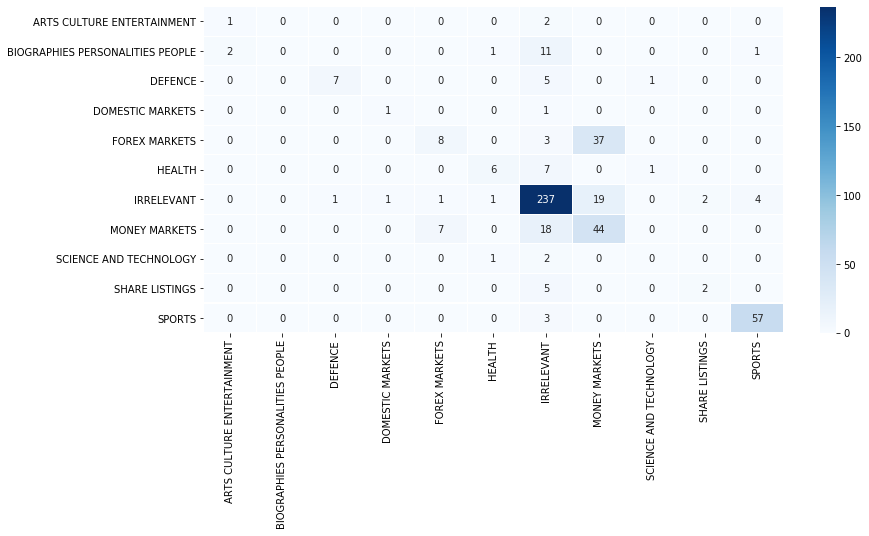

In [103]:
fig1 = plt.figure(figsize=(13,6))
sns.heatmap(conf_matrix,
#             square=True,
            annot=True, # show numbers in each cell
            fmt='d', # set number format to integer in each cell
            yticklabels=clf.classes_,
            xticklabels=clf.classes_,
            cmap="Blues",
#             linecolor="k",
            linewidths=.1,
           )
plt.title(
          f"Confusion Matrix on Test Set | " 
          f"Classifier: {'+'.join([step for step in clf.named_steps.keys()])}", 
          fontsize=14)
plt.xlabel("Actual: False positives for y != x", fontsize=12)
plt.ylabel("Prediction: False negatives for x != y", fontsize=12)
plt.show()